# Assignment 5
## Data Analysis and Visualization

These assignments are related to visualization with **MathPlotLib** and **Seaborn** libraries.
* [Matplotlib](https://matplotlib.org/)
* [seaborn](https://seaborn.pydata.org/)

In these assignments, you must program some new code to get as an output figure given in assignment.
* Read the related course material before doing the assignments from the
[Topic 5. Visualization](https://ttc8040.pages.labranet.jamk.fi/da_vi_material/lectures/topic5_visualize.nbconvert/).



## Assignment 05-01. Visualizing Weather Data

Visualize weather data loaded from the [Finnish Meteorological Institute's WFS interface](https://en.ilmatieteenlaitos.fi/download-observations) using a `DataFrame`. Before plotting the data, you need to process it as follows:
* Load the data into a `DataFrame` from the file `'data/saatiedot.csv'`, considering that ',' is the column separator and '.' is the decimal separator.
* The first column (or index) of the data contains the time in the format **year-month-day hours:minutes:seconds**.
* Create a new `DataFrame` column `'time, s'` indicating the amount of time in seconds from the first measurement onwards.
* Add a new column `'Air temperature, degC'` to the `DataFrame`.
* Print the first five rows of your processed `DataFrame`.

After processing the data, create an x-y plot as follows:
* Use the column `'time, s'` on the horizontal axis and the column `'Air temperature, degC'` on the vertical axis.
* Mark data points with red dots.
* Provide a legend for the red dots, labeled as `'Air temperature'`.
* Use `'time, s'` for the x-axis title and `'Air temperature $^{o}C$'` for the y-axis title.
* Use [TeX syntax](https://en.wikipedia.org/wiki/TeX) to denote the physical unit in the y-axis title.
* Add a grid with a _black dashed line_.

**The final result should look like the following image:**

![h5.1](./img/h5_t1.png)

In [10]:
import pandas as pd
# Loading the data 
file_path = 'data/saatiedot.csv'
data = pd.read_csv(file_path, sep=',', decimal='.')
data.head()

,Unnamed: 0,"Air temperature, degC","Wind speed, m/s","Gust speed, m/s","Wind direction, deg","Relative humidity, %","Dew-point temperature, degC","Snow depth, cm","Pressure (msl), hPa","Horizontal visibility, m","Cloud amount, 1/8"
0,2020-11-04 13:20:00,6.5,2.3,4.3,187.0,79.0,3.1,NaN,1011.3,51434.0,4.0
1,2020-11-04 13:30:00,6.2,2.5,3.9,180.0,80.0,3.0,NaN,1011.4,53238.0,4.0
2,2020-11-04 13:40:00,5.7,2.3,3.5,173.0,81.0,2.8,NaN,1011.4,50053.0,4.0
3,2020-11-04 13:50:00,5.7,2.8,4.0,164.0,81.0,2.7,NaN,1011.3,52636.0,6.0
4,2020-11-04 14:00:00,5.7,3.1,4.2,164.0,83.0,2.9,NaN,1011.1,50378.0,7.0


In [11]:
# Renaming the first unnamed column to 'Timestamp'
data.rename(columns={'Unnamed: 0': 'Timestamp'}, inplace=True)

# Converting the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Calculate the time in seconds from the first measurement
data['time, s'] = (data['Timestamp'] - data['Timestamp'].iloc[0]).dt.total_seconds()

# Printing the first five rows of the processed DataFrame
processed_data = data[['time, s', 'Air temperature, degC']]
processed_data.head()



,"time, s","Air temperature, degC"
0,0.0,6.5
1,600.0,6.2
2,1200.0,5.7
3,1800.0,5.7
4,2400.0,5.7


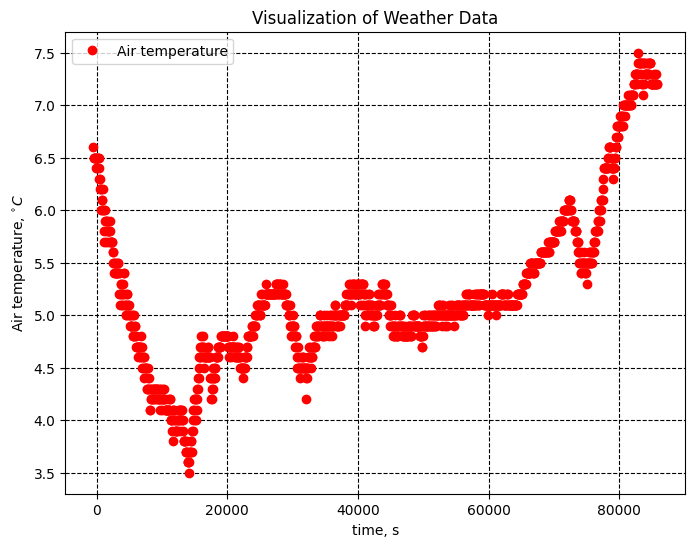

In [12]:
import matplotlib.pyplot as plt

y_label = r'Air temperature, $^{\circ}C$'

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(processed_data['time, s'], processed_data['Air temperature, degC'], 'ro', label='Air temperature')
plt.xlabel('time, s')
plt.ylabel(y_label)
plt.title('Visualization of Weather Data')
plt.grid(True, linestyle='--', color='black')
plt.legend()
plt.show()


## Assignment 05-02. Premier League Standings

Visualize selected Premier League football teams' home and away wins in the same bar chart. Before plotting the data, you need to process it as follows:
* Load the data into a `DataFrame` from the given url address (`"data/england-premier-league-teams-2018-to-2019-stats.csv"`).
* Add new columns `common_name`, `wins_home` (home wins), and `wins_away` (away wins) to the DataFrame.
* Select the following teams from the DataFrame (`common_name` column): `'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'`
* Shorten the team names for the chart by creating a new column `short_name` with the following names: `'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton'`
* Create a new DataFrame using the `df.melt(id_vars, var_name, value_name ...)` method with new columns `Win Type` and `Wins`
```
   short_name   Win Type  Wins
0     Arsenal  wins_home    14
::::::::::::::::::::::::::::::
7     Arsenal  wins_away     7
```

* After processing the data, create a bar chart on an (x, y)-plane, where the x-axis shows the team's shortened name and the y-axis shows both home wins (`wins_home`) and away wins (`wins_away`).
* Provide a legend for the bars (hint: `Legend`).
* Rotate the x-axis titles by 30 degrees (hint: `xticks`).
* Set a title for the chart.

**The final result should look like the following image:**

![h5.2](./img/h5_t2.png)

In [51]:
# Loading the data
file_path_premier_league = 'data/england-premier-league-teams-2018-to-2019-stats.csv'
premier_league_data = pd.read_csv(file_path_premier_league)

# Adding new columns for common_name, wins_home, and wins_away
premier_league_data['common_name'] = premier_league_data['common_name'].str.title()
premier_league_data['wins_home'] = premier_league_data['wins_home']
premier_league_data['wins_away'] = premier_league_data['wins_away']

# Selecting the specified teams and create a mapping for their short names
selected_teams = [
    'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United',
    'Chelsea', 'Liverpool', 'Everton'
]
short_names = {
    'Arsenal': 'Arsenal', 'Tottenham Hotspur': 'Tottenham',
    'Manchester City': 'ManCity', 'Manchester United': 'ManU',
    'Chelsea': 'Chelsea', 'Liverpool': 'Liverpool', 'Everton': 'Everton'
}

# Filtering the DataFrame for the selected teams and map the short names
premier_league_filtered_corrected = premier_league_data[premier_league_data['common_name'].isin(selected_teams)].copy()
premier_league_filtered_corrected['short_name'] = premier_league_filtered_corrected['common_name'].map(short_names)


premier_league_melted_corrected = premier_league_filtered_corrected.melt(
    id_vars='short_name',
    value_vars=['wins_home', 'wins_away'],
    var_name='Win Type',
    value_name='Wins'
)

premier_league_melted_corrected.head(14)


,short_name,Win Type,Wins
0,Arsenal,wins_home,14
1,Tottenham,wins_home,12
2,ManCity,wins_home,18
3,Everton,wins_home,10
4,ManU,wins_home,10
5,Liverpool,wins_home,17
6,Chelsea,wins_home,12
7,Arsenal,wins_away,7
8,Tottenham,wins_away,11
9,ManCity,wins_away,14


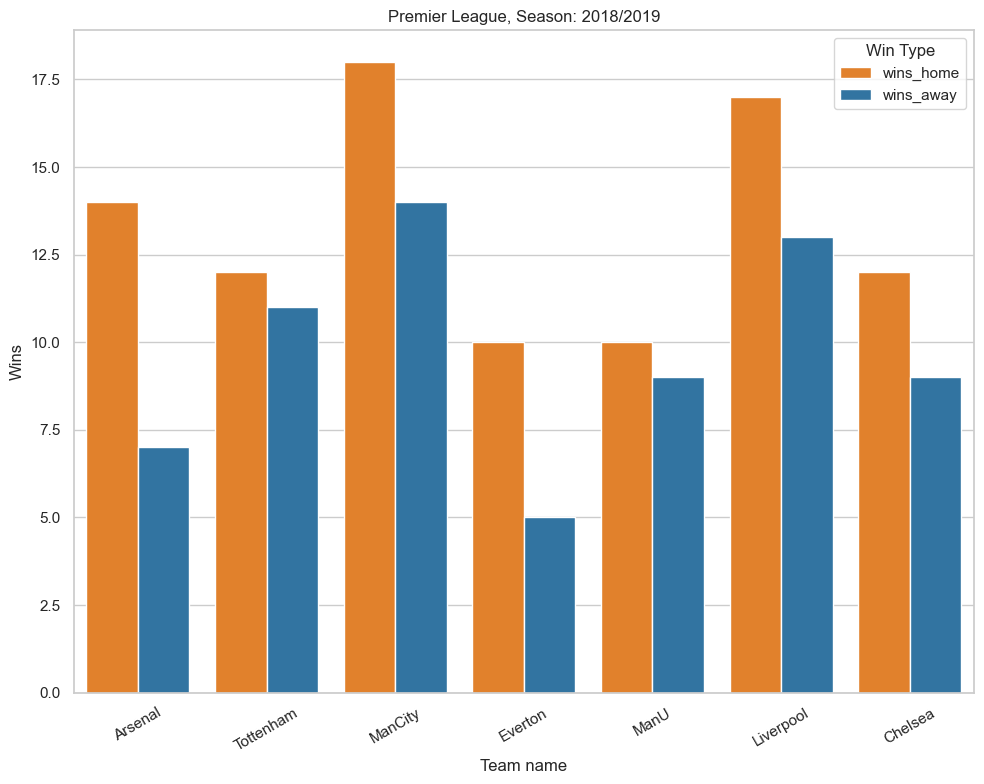

In [52]:
import seaborn as sns

# Setting the aesthetics for the bar plot
sns.set_theme(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(
    x='short_name',
    y='Wins',
    hue='Win Type',
    data=premier_league_melted,
    palette=['#ff7f0e', '#1f77b4']
)

# Rotating the x-axis titles
plt.xticks(rotation=30)

# Setting a title for the chart
plt.title('Premier League, Season: 2018/2019')

# Setting labels for axes
plt.xlabel('Team name')
plt.ylabel('Wins')

# Providing a legend for the bars
plt.legend(title='Win Type')

# Showing the plot
plt.tight_layout()
plt.show()


## Assignment 05-03. Premier League Standings

Visualize Premier League football data for selected teams, showing both home and away wins in the same bar chart. Before plotting the data, process it as follows:
* Load the data into a `DataFrame` from the file `"data/england-premier-league-teams-2018-to-2019-stats.csv"`.
* Add columns `team_name, common_name, season, wins, draws`, and `losses` to the `DataFrame`.
* Select the following teams (`common_name`): `'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'`
* Shorten the team names for the chart by creating a new column `short_name` with the following names: `'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton'`
* Add a completely new column `points` to the `DataFrame` using the formula: `wins * 3 + draws` (0 points for losses).

After processing the data, create a bar chart on a transposed (x, y)-plane, where the y-axis shows the shortened team name, and the x-axis shows the points collected by the team.
* Try to rotate the y-axis titles by _30_ degrees (hint: `plt.yticks`).
* Add dynamically a title for the y-axis, including information about the season (`season`) and the number of matches played (`matches_played`) from the original `DataFrame`.
* Add a grid to the chart (hint: `grid`).

**The final result should look like the following image:**

![h5.3](./img/h5_t3.png)

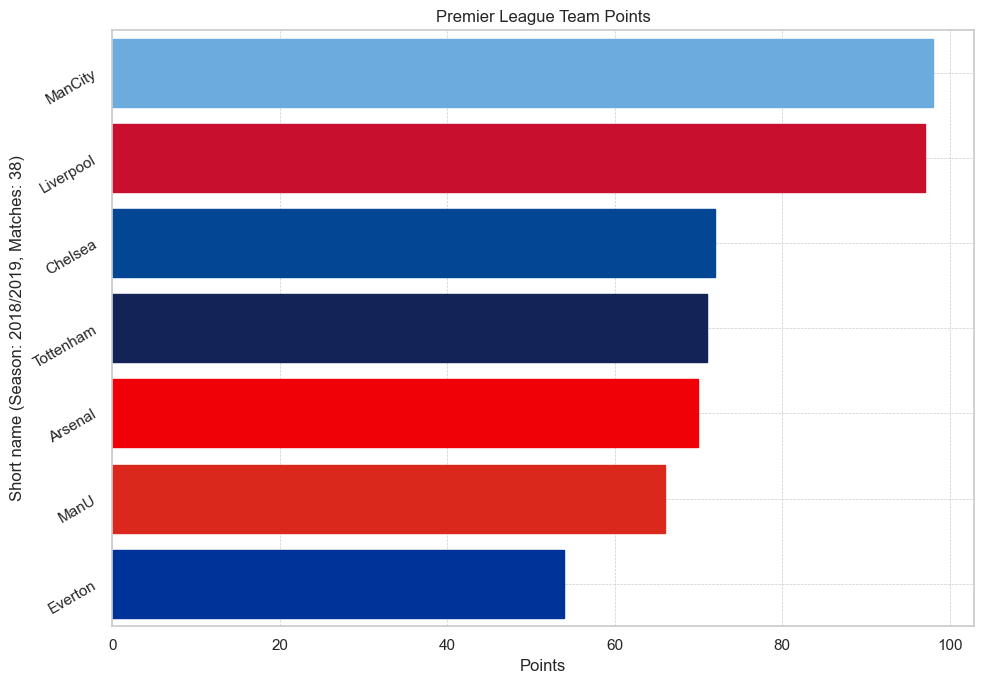

In [53]:
# Loading the data
file_path_premier_league_stats = 'data/england-premier-league-teams-2018-to-2019-stats.csv'
pl_stats_data = pd.read_csv(file_path_premier_league_stats)

# Adding new columns to the DataFrame
pl_stats_data['team_name'] = pl_stats_data['team_name'].str.title()
pl_stats_data['common_name'] = pl_stats_data['common_name'].str.title()
pl_stats_data['season'] = pl_stats_data['season']
pl_stats_data['wins'] = pl_stats_data['wins']
pl_stats_data['draws'] = pl_stats_data['draws']
pl_stats_data['losses'] = pl_stats_data['losses']

# Selecting the specified teams
selected_teams = [
    'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United',
    'Chelsea', 'Liverpool', 'Everton'
]

# Shortening the team names
short_names = {
    'Arsenal': 'Arsenal', 'Tottenham Hotspur': 'Tottenham',
    'Manchester City': 'ManCity', 'Manchester United': 'ManU',
    'Chelsea': 'Chelsea', 'Liverpool': 'Liverpool', 'Everton': 'Everton'
}

# Filtering the DataFrame for the selected teams and map the short names
pl_stats_selected = pl_stats_data[pl_stats_data['common_name'].isin(selected_teams)].copy()
pl_stats_selected['short_name'] = pl_stats_selected['common_name'].map(short_names)

# Adding a column for points using the formula: wins * 3 + draws
pl_stats_selected['points'] = pl_stats_selected['wins'] * 3 + pl_stats_selected['draws']

# Extracting season and matches_played information for the y-axis title
season = pl_stats_selected['season'].iloc[0]
matches_played = pl_stats_selected['matches_played'].iloc[0]

sorted_data = pl_stats_selected.sort_values('points', ascending=False)

# Now we create the bar chart with the transposed (x, y)-plane
plt.figure(figsize=(10, 7))
bar_plot = sns.barplot(
    x='points',
    y='short_name',
    data=sorted_data,
    color='lightgray'  # Set all bars to a neutral color initially
)

# Defining the colors for each team
team_colors = {
    'Arsenal': '#EF0107', 'Tottenham': '#132257', 'ManCity': '#6CABDD',
    'ManU': '#DA291C', 'Chelsea': '#034694', 'Liverpool': '#C8102E', 'Everton': '#003399'
}

# Setting the colors of each bar according to the team
for patch, row in zip(bar_plot.patches, sorted_data['short_name']):
    patch.set_color(team_colors[row])

# Rotating the y-axis titles
plt.yticks(rotation=30)

# Adding a grid to the chart
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding title for the y-axis dynamically
plt.ylabel(f'Short name (Season: {season}, Matches: {matches_played})')

# Setting the title for the x-axis
plt.xlabel('Points')

# Adding a title to the chart
plt.title('Premier League Team Points')

# Showing the plot
plt.tight_layout()
plt.show()


## Assignment 05-04. Visualizing Car Data

Load the data into a `DataFrame` from the file: `data/autot.csv`.
Save only those rows in a new `DataFrame` where the car manufacturer (column `Mh`) has more than 50 cars. In the new `DataFrame`, replace the string `'DIESEL'` in column `Ft` with `'Diesel'` and `'PETROL'` with `'Petrol'`. If the string `'NG'` appears in column `Ft`, replace it with `'Natural gas'`.

The result of the visualization is an image similar to the one below, where you utilize the columns of your `DataFrame` for the car fuel type `Ft` and the car manufacturer `Mh`.

**The final result should look like the following image:**

![h5.4](./img/h5_t4.png)

In [54]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('data/autot.csv')

# Displaying the first few rows
df.head()


,ID,MS,Mp,VFN,Mh,Man,MMS,TAN,T,Va,...,Fm,ec (cm3),ep (KW),z (Wh/km),It,Ernedc (g/km),Erwltp (g/km),De,Vf,r
0,3142422,PL,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA AUTO AS,e8*2007/46*0317*00,3T,AACZEAX01,...,M,1395.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,13048320,BE,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA,e8*2007/46*0272*03,NU,ACDADAX0,...,M,1498.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,9455476,DE,VW GROUP PC,IP-08-TMB-2018-2148,SKODA,SKODA AUTO AS,SKODA (CZ),e8*2007/46*0249*08,NS,ACDFHAX1,...,M,1968.0,140.0,NaN,NaN,NaN,NaN,NaN,0.0,1
3,3142534,PL,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA AUTO AS,e8*2007/46*0317*00,3T,ACCZEAX01,...,M,1395.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,9349418,DE,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA (CZ),e11*2001/116*0291*53,5J,ACCUSBX01,...,M,1422.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [49]:
# Filtering rows where the car manufacturer has more than 50 cars
filtered_df = df.groupby('Mh').filter(lambda x: len(x) > 50)

# Replacing the specified values in the 'Ft' column
filtered_df['Ft'] = filtered_df['Ft'].replace({'DIESEL': 'Diesel', 'PETROL': 'Petrol', 'NG': 'Natural gas'})

# Displaying the updated DataFrame
filtered_df.head()


,ID,MS,Mp,VFN,Mh,Man,MMS,TAN,T,Va,...,Fm,ec (cm3),ep (KW),z (Wh/km),It,Ernedc (g/km),Erwltp (g/km),De,Vf,r
0,3142422,PL,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA AUTO AS,e8*2007/46*0317*00,3T,AACZEAX01,...,M,1395.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,13048320,BE,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA,e8*2007/46*0272*03,NU,ACDADAX0,...,M,1498.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,9455476,DE,VW GROUP PC,IP-08-TMB-2018-2148,SKODA,SKODA AUTO AS,SKODA (CZ),e8*2007/46*0249*08,NS,ACDFHAX1,...,M,1968.0,140.0,NaN,NaN,NaN,NaN,NaN,0.0,1
3,3142534,PL,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA AUTO AS,e8*2007/46*0317*00,3T,ACCZEAX01,...,M,1395.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,9349418,DE,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA (CZ),e11*2001/116*0291*53,5J,ACCUSBX01,...,M,1422.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [36]:
# Grouping the filtered DataFrame by 'Mh' and 'Ft' and counting the number of cars
df_plot_data = df_filtered.groupby(['Mh', 'Ft']).size().reset_index(name='Number of cars')

# Pivoting the DataFrame to have manufacturers as index, fuel types as columns, and car counts as values
df_pivot = df_plot_data.pivot(index='Mh', columns='Ft', values='Number of cars').fillna(0)

# Checking the pivoted DataFrame
df_pivot.head()

Ft,Diesel,Electric,Natural gas,Petrol
Mh,,,,
AUTOMOBILES CITROEN,299.0,0.0,0.0,635.0
FORD WERKE GMBH,165.0,0.0,0.0,207.0
NISSAN,21.0,7.0,0.0,54.0
SKODA,1332.0,0.0,33.0,2187.0


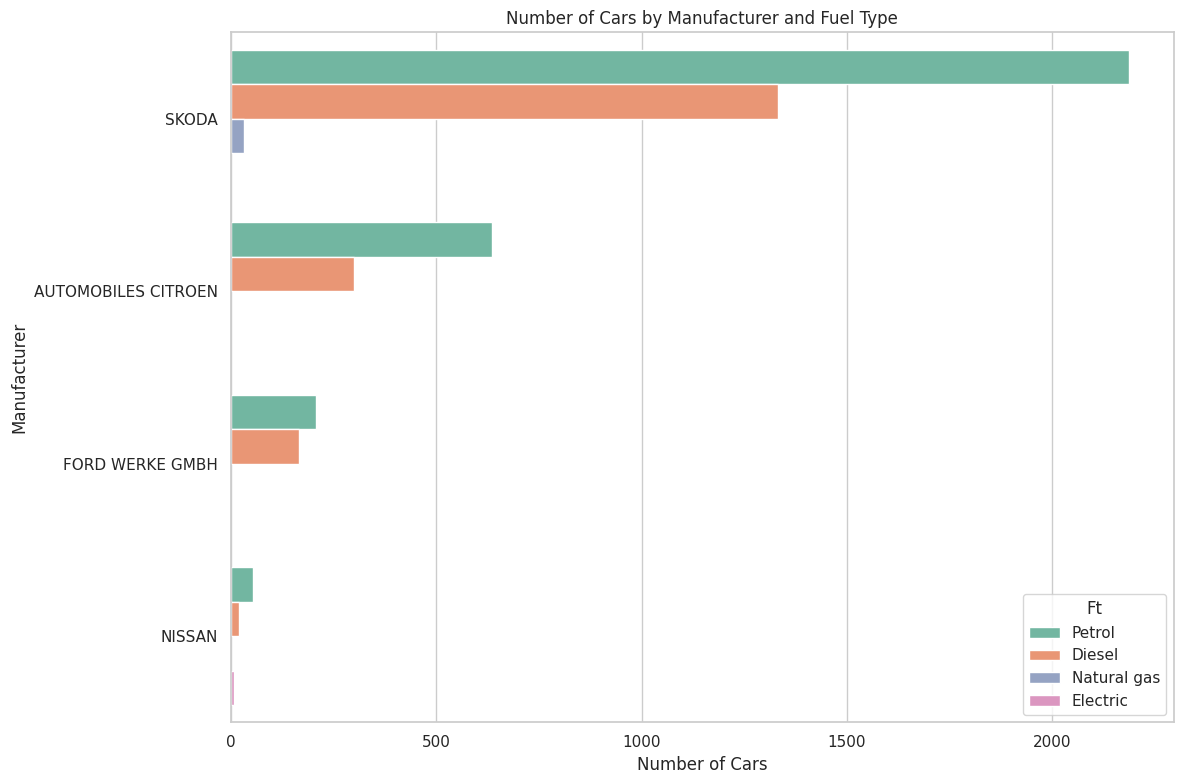

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plot size
plt.figure(figsize=(12, 8))

# Creating a countplot to visualize the number of cars by manufacturer and fuel type
sns.countplot(y='Mh', hue='Ft', data=filtered_df, palette='Set2', order=filtered_df['Mh'].value_counts().index)

# Adding title and labels
plt.title('Number of Cars by Manufacturer and Fuel Type')
plt.xlabel('Number of Cars')
plt.ylabel('Manufacturer')

# Display the plot
plt.tight_layout()
plt.show()


## Assignment 05-05. Visualizing Car Data Part 2

Load the same data as in previous assignment into a `DataFrame` from the file: `data/autot.csv`

The result of the visualization is a _histogram_ similar to the one below, showing the distribution of $CO_2$ emissions (column `Enedc (g/km)`) in 100 different bins and a *cumulative histogram* of $CO_2$ emissions

**The final result should look like the following image:**

![h5.5](./img/h5_t5.png)


In [43]:
import pandas as pd

# Loading the data
file_path = 'data/autot.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows
df.head()

,ID,MS,Mp,VFN,Mh,Man,MMS,TAN,T,Va,...,Fm,ec (cm3),ep (KW),z (Wh/km),It,Ernedc (g/km),Erwltp (g/km),De,Vf,r
0,3142422,PL,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA AUTO AS,e8*2007/46*0317*00,3T,AACZEAX01,...,M,1395.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,13048320,BE,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA,e8*2007/46*0272*03,NU,ACDADAX0,...,M,1498.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,9455476,DE,VW GROUP PC,IP-08-TMB-2018-2148,SKODA,SKODA AUTO AS,SKODA (CZ),e8*2007/46*0249*08,NS,ACDFHAX1,...,M,1968.0,140.0,NaN,NaN,NaN,NaN,NaN,0.0,1
3,3142534,PL,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA AUTO AS,e8*2007/46*0317*00,3T,ACCZEAX01,...,M,1395.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,9349418,DE,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA (CZ),e11*2001/116*0291*53,5J,ACCUSBX01,...,M,1422.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,1


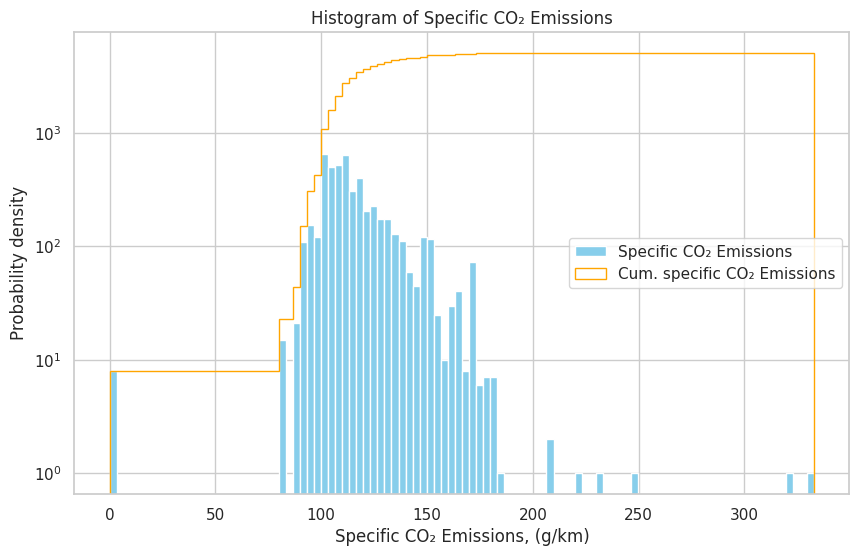

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Checking if the column 'Enedc (g/km)' exists
column_name = 'Enedc (g/km)'
if column_name in df.columns:
    # Filtering out possible NaN values for the histogram
    emissions_data = df[column_name].dropna()
    
    # Setting a font that supports the glyph for subscript two (CO₂)
    plt.rcParams.update({'font.family': 'DejaVu Sans'})
    
    # Redrawing the histogram with the updated font settings to support the CO₂ glyph
    
    plt.figure(figsize=(10, 6))
    
    # Histogram
    n, bins, patches = plt.hist(emissions_data, bins=100, color='skyblue', label='Specific CO₂ Emissions')
    
    # Cumulative histogram
    plt.hist(emissions_data, bins=100, cumulative=True, color='orange', histtype='step', label='Cum. specific CO₂ Emissions')
    
    # Setting the scale of the y-axis to be logarithmic to match the example
    plt.yscale('log')
    
    # Labeling
    plt.xlabel('Specific CO₂ Emissions, (g/km)')
    plt.ylabel('Probability density')
    plt.title('Histogram of Specific CO₂ Emissions')
    
    # Adding a legend
    plt.legend()
    
    # Showing plot
    plt.grid(True)
    plt.show()
